Generating sentiment distribution bar chart


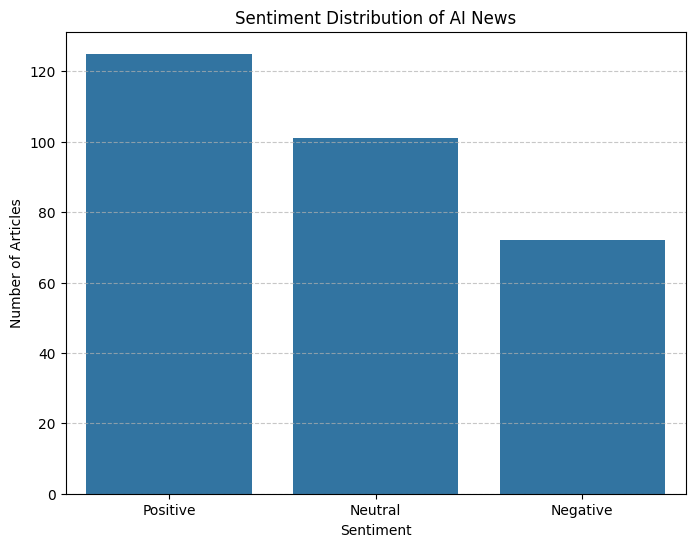

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('ai_news_with_sentiment_scores.csv')

#  Bar Chart for Sentiment Ratios 
print("Generating sentiment distribution bar chart")
plt.figure(figsize=(8, 6))
sentiment_counts = df['sentiment'].value_counts()

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution of AI News')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('sentiment_bar_chart.png')
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source           298 non-null    object 
 1   title            298 non-null    object 
 2   description      283 non-null    object 
 3   url              298 non-null    object 
 4   publishedAt      298 non-null    object 
 5   full_text        298 non-null    object 
 6   processed_text   298 non-null    object 
 7   sentiment_score  298 non-null    float64
 8   sentiment        298 non-null    object 
dtypes: float64(1), object(8)
memory usage: 21.1+ KB


Generating hourly sentiment trend chart using 'publishedAt' column...
sentiment            Negative  Neutral  Positive
publishedAt                                     
2025-10-14 10:00:00         5       13         7
2025-10-14 11:00:00        17       24        32
2025-10-14 16:00:00         3       10        17
2025-10-14 17:00:00        37       35        59
2025-10-14 18:00:00        10       19        10


<Figure size 1000x1000 with 0 Axes>

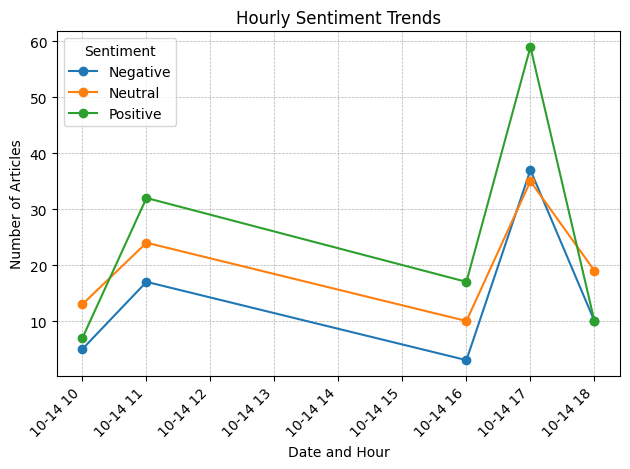

In [4]:
#  Line Chart for Sentiment Trends Over Time 

date_col = 'publishedAt' 

print(f"Generating hourly sentiment trend chart using '{date_col}' column...")

df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Groupby Hour
sentiment_over_time = df.groupby([df[date_col].dt.floor('h'), 'sentiment']).size().unstack(fill_value=0)
print(sentiment_over_time)


plt.figure(figsize=(10, 10)) 
sentiment_over_time.plot(kind='line', marker='o')

plt.title('Hourly Sentiment Trends')
plt.xlabel('Date and Hour')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha="right") 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()